In [2]:
import pandas as pd
import geopandas
from datetime import datetime
import matplotlib.pyplot as plt

# Conflict and Drought

Drought is often reported to lead to conflict in the form of violence or protests. There were ['thirsty protests'](https://phys.org/news/2017-10-thirsty-protests-morocco-shortages.html) in the country which saw citizens protesting over water shortages. news of these protests has only incraesed over the years. This notebook is an exploration of any observed correlations between drought conditions and protests within Morocco. 

This data is insufficient to show causation. The idea is to show that there is an increase in protests in Morocco, some of which are because of water, as suggested by sources outside this data, for instance, by the [Centre for Strategic and International Studies](https://www.csis.org.mcas.ms/analysis/water-pressure-water-protest-and-state-legitimacy-maghreb) and the [United States Institute of Peace](https://www.usip.org/publications/2022/06/morocco-reflects-global-south-dilemma-water-or-food). 

Although there is research that suggests that water causes conflict, there is also enough evidence to show that water can enable cooperation. This is best articulated in [Borgomeo et. al., 2021.](https://openknowledge.worldbank.org.mcas.ms/server/api/core/bitstreams/7b8cb26b-a170-587a-8bbd-920e430ea81c/content?McasCtx=4&McasTsid=20893). 

In this context, ACLED data is just meant to be a data point that can be monitored to see the trends in changing conflict and rising protests. I agree with your point that the narrative needs to be tighter. Depending on the rest of your report, if you think it can be useful, happy to modify the plots to a level of granularity you want to use. 


In [3]:
acled = pd.read_csv('../data/conflict/1997-01-01-2023-08-08-Morocco.csv')

In [4]:
morocco_adm0 = geopandas.read_file('../data/shapefiles/mar_adm0.shp')
morocco_adm1 = geopandas.read_file('../data/shapefiles/mar_adm1.shp')
morocco_adm2 = geopandas.read_file('../data/shapefiles/mar_adm2.shp')

In [5]:
acled = geopandas.GeoDataFrame(acled, geometry = geopandas.points_from_xy(acled['longitude'], acled['latitude']))
acled = morocco_adm0.sjoin(acled)
acled = geopandas.GeoDataFrame(acled, geometry=geopandas.points_from_xy(acled['longitude'], acled['latitude']))
acled['event_date'] = acled['event_date'].apply(lambda x: datetime.strptime(x, '%d %B %Y'))
acled.drop(columns='index_right', inplace=True)

c:\Users\sahit\anaconda3\envs\heatwaves\lib\site-packages\geopandas\geodataframe.py:2061: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [6]:
acled_adm1 = morocco_adm1.sjoin(acled)
acled_adm0 = morocco_adm0.sjoin(acled)

Text(0.5, 0.98, 'Number of conflict events in Morocco')

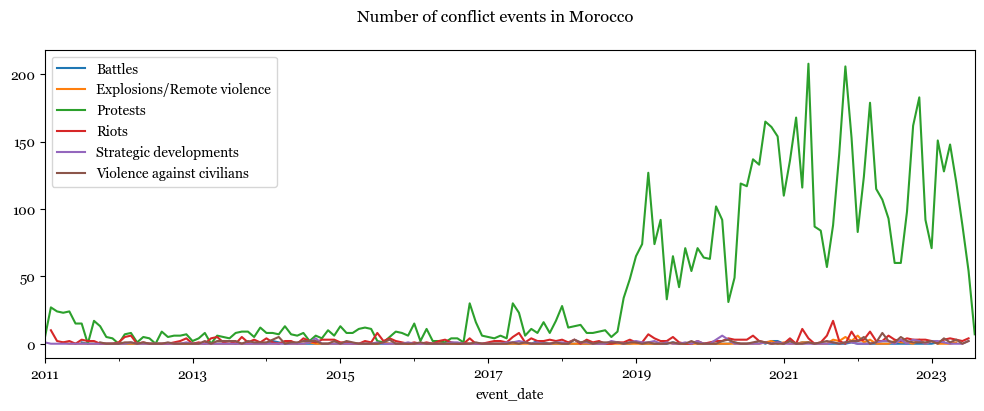

In [153]:
from matplotlib import rcParams

acled_month = acled_month[acled_month['event_date'].dt.year>2010]

rcParams['font.family'] = 'Georgia'
rcParams['font.sans-serif'] = ['Georgia']

fig, ax = plt.subplots(figsize=(12,4))

for event_type in acled_month['event_type'].unique():
    p = acled_month[acled_month['event_type']==event_type]
    p.groupby([pd.Grouper(key = 'event_date', freq='M')]).sum().reset_index().plot(x='event_date', y='timestamp', ax=ax, label = event_type)

fig.suptitle('Number of conflict events in Morocco')

In [109]:
drought = pd.read_csv('../data/spi_class_adm1.csv')
drought['time'] = drought['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').replace(hour=0, minute=0, second=0, microsecond=0))
#drought['time'] = drought['time'].apply(lambda x: pd.datetime(x))
drought.drop(columns = 'Unnamed: 0', inplace=True)
#drought = drought.groupby(pd.Grouper(key='time', freq='M')).sum()

## A closer look at Marakkesh, Casablanca and Rabat

In [132]:
acled_adm1 = morocco_adm1.sjoin(acled)
acled_adm1 = acled_adm1.groupby([pd.Grouper(key='event_date', freq='M'), 'adm1_name']).agg({'timestamp':'count', 'fatalities':'sum'}).reset_index()

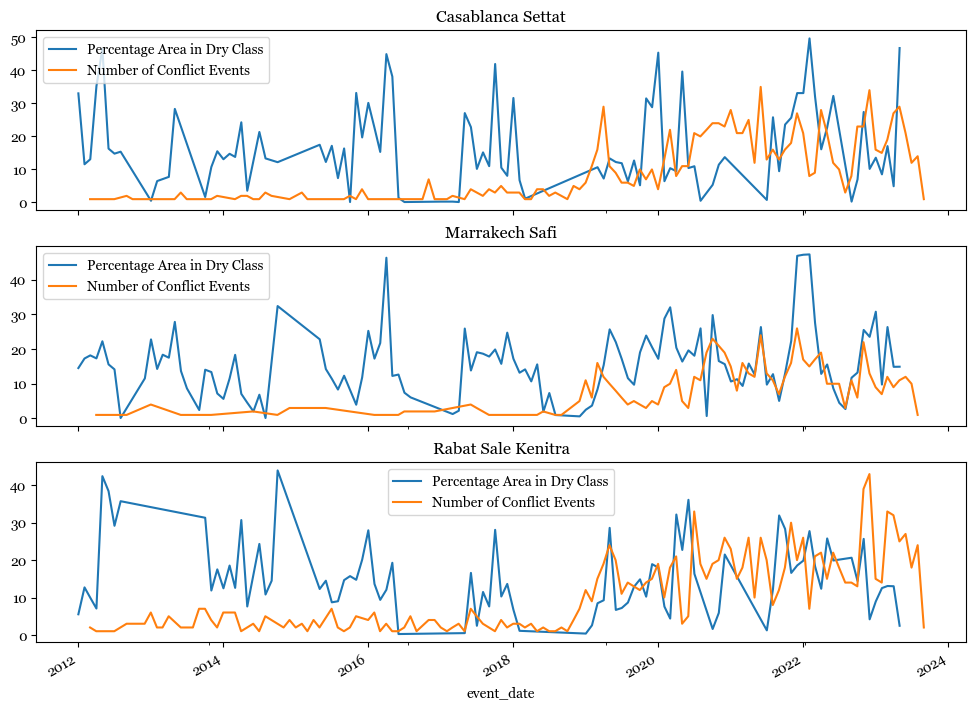

In [151]:
drought = drought[drought['time'].dt.year>=2012]
acled_adm1 = acled_adm1[acled_adm1['event_date'].dt.year>=2012]

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12,9))

p = drought.groupby(['adm1_name', 'class_type', 'time']).sum().reset_index()
p['percentage_area'] = 100*p['class_area']/p['adm_area']

for i, admin_region in enumerate(['Casablanca Settat', 'Marrakech Safi', 'Rabat Sale Kenitra']):
    
    p[(p['adm1_name']==admin_region)&(p['class_type']=='Dry Classes')].plot(x='time', y='percentage_area', ax=ax[i], label = 'Percentage Area in Dry Class')
    acled_adm1[acled_adm1['adm1_name']==admin_region].plot(x='event_date', y='timestamp', ax=ax[i], label = 'Number of Conflict Events')
    ax[i].set_title(admin_region)

#drought[drought['adm1_name'].isin(['Rabat Sale Kenitra',  'Marrakech Safi', 'Casablanca Settat'])]

In [22]:
p = acled.groupby(['latitude', 'longitude']).agg({'timestamp':'count', 'fatalities':'sum'}).reset_index()
p = geopandas.GeoDataFrame(p, geometry=geopandas.points_from_xy(p['longitude'], p['latitude']))

In [29]:
#p.plot(column='timestamp', cmap='Reds', legend=True, vmax=100)